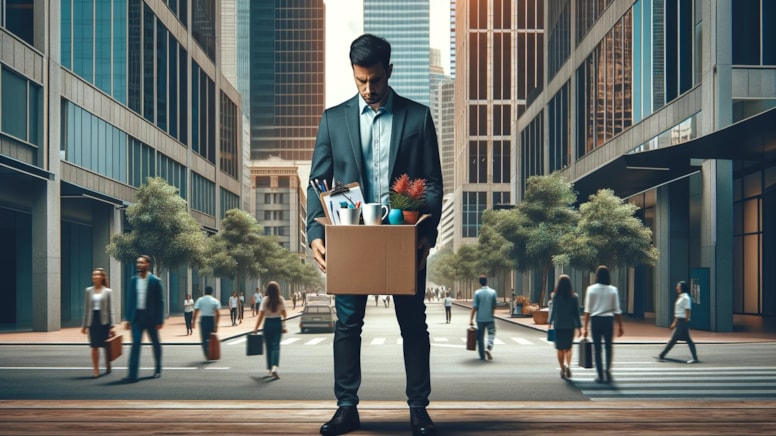

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
from folium import plugins
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     
# Kullanmayı düşündüğümüz kütüphaneleri çalıştırdık.
# We ran the libraries we were planning to use.

In [51]:
# Global işsizlik verilerini analiz ederek dünya genelindeki eğilimleri inceledim ve görselleştirdim. 
# Daha sonra Türkiye'ye özel bir analiz yaparak birkaç grafik oluşturdum. 
# Son olarak, Avrupa ülkelerinin işsizlik verilerini karşılaştırmalı bir şekilde değerlendirdim.

# I analyzed global unemployment data, examining and visualizing trends worldwide. 
# Then, I created several graphs focusing on Turkey's specific unemployment rates. 
# Finally, I conducted a comparative analysis of unemployment data for European countries.

In [52]:
original_df = pd.read_csv('global_unemployment_data.csv') # datayı çağırdık. we called data.

In [53]:
df = original_df.copy() #Burada datayının kopyasını aldık.  - Here we have a copy of the database.

In [54]:
df.sample(5) # we saw 5 random rows of data -  datanın rastgele 5 satırını gördük.

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1006,Thailand,Unemployment rate by sex and age,Male,25+,Adults,0.319,0.334,0.365,0.466,0.430,0.387,0.703,0.793,0.533,0.458,0.412
445,Hungary,Unemployment rate by sex and age,Female,25+,Adults,6.924,6.345,4.506,4.018,3.520,3.015,3.845,3.520,3.091,3.541,3.591
162,Cambodia,Unemployment rate by sex and age,Female,15-24,Youth,1.009,0.999,1.223,0.440,0.452,0.469,0.560,1.009,0.881,0.815,0.790
745,North Macedonia,Unemployment rate by sex and age,Female,25+,Adults,26.313,23.449,20.754,19.903,18.424,16.654,14.302,12.736,10.693,11.328,10.857
704,Nepal,Unemployment rate by sex and age,Female,Under 15,Children,12.131,12.106,12.087,12.062,12.042,12.021,14.408,13.972,12.492,12.498,12.456


In [55]:
# dataframe shape -  şeklini gördük.
df.shape

(1134, 16)

In [56]:
df.nunique() 
# Her sütunda benzersiz kaç değer olduğunu gördük.
# We saw how many unique values are in each column.

country_name       189
indicator_name       1
sex                  2
age_group            3
age_categories       3
2014              1102
2015              1114
2016              1105
2017              1102
2018              1095
2019              1103
2020              1103
2021              1097
2022              1103
2023              1088
2024              1089
dtype: int64

In [57]:
df.info() # data bilgilerini gördük.- We saw the data information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [58]:
df.duplicated().value_counts() 
# Data içerisndeki aynı satırlaın kontrolü yapıldı. Benzer satır bulunamadı.
# The same rows in the data were checked. No similar row found.

False    1134
Name: count, dtype: int64

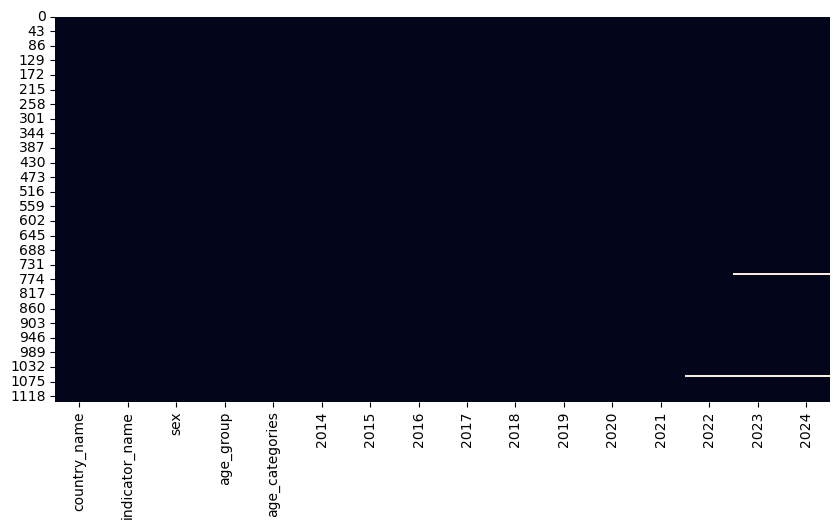

In [59]:
plt.figure(figsize=(10,5)) 
# Eksik değerleri heatmap grafiği kullanarak görmüş olduk.
# We have seen the missing values using the heatmap chart.
sns.heatmap(df.isnull(), cbar=False); 
# Çizgiler eksik verilerin olduğunu gösterdi.
# The lines showed that there was missing data.

In [60]:
df.isna().sum() 
# Null değerlerin sayısını görmüş olduk.
# We have seen the number of null values.

country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [61]:
df[df.isnull().any(axis=1)] 
# Filistin verilerinde 2023 ve 2024 yılları eksik.(Filistin toprakları işgal altında olduğu için.)
# The years 2023 and 2024 are missing in the Palestinian data (because the Palestinian territories are under occupation).
# Ukrayna verilerinde 2022,2023 ve 2024 verileri eksik.(Ukrayna toprakların da savaş olduğu için.)
# Ukraine is missing data for 2022, 2023 and 2024 (due to the war in Ukraine).


,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
756,Palestinian Territories,Unemployment rate by sex and age,Female,15-24,Youth,51.653,56.179,60.753,66.914,69.188,66.831,69.503,64.249,56.709,NaN,NaN
757,Palestinian Territories,Unemployment rate by sex and age,Female,25+,Adults,20.681,28.478,31.496,35.803,35.161,35.022,33.515,37.921,36.385,NaN,NaN
758,Palestinian Territories,Unemployment rate by sex and age,Female,Under 15,Children,26.084,34.121,37.727,42.521,41.621,40.891,39.812,42.551,40.045,NaN,NaN
759,Palestinian Territories,Unemployment rate by sex and age,Male,15-24,Youth,33.669,33.242,33.696,36.220,36.698,34.448,36.227,36.866,31.563,NaN,NaN
760,Palestinian Territories,Unemployment rate by sex and age,Male,25+,Adults,14.085,15.385,15.868,16.334,17.476,17.043,18.443,17.955,16.772,NaN,NaN
761,Palestinian Territories,Unemployment rate by sex and age,Male,Under 15,Children,19.144,20.083,20.448,21.375,22.271,21.195,22.335,22.224,20.186,NaN,NaN
1056,Ukraine,Unemployment rate by sex and age,Female,15-24,Youth,22.811,22.116,21.759,16.976,19.305,15.365,18.539,20.412,NaN,NaN,NaN
1057,Ukraine,Unemployment rate by sex and age,Female,25+,Adults,6.292,6.990,6.669,7.069,6.615,7.345,8.508,9.519,NaN,NaN,NaN
1058,Ukraine,Unemployment rate by sex and age,Female,Under 15,Children,7.568,8.105,7.729,7.735,7.442,7.856,9.077,10.143,NaN,NaN,NaN
1059,Ukraine,Unemployment rate by sex and age,Male,15-24,Youth,24.177,22.940,24.103,20.388,16.926,15.486,19.900,18.085,NaN,NaN,NaN


In [62]:
row_means = df[['2014', '2021']].mean(axis=1)
# '2014' ve '2021' sütunlarının satır ortalamalarını hesaplar
# Calculates row-wise mean of the '2014' and '2021' columns


In [63]:
df = df.apply(lambda row: row.fillna(row_means[row.name]), axis=1)
# NaN değerleri, her satırın ortalaması ile doldurur
# Fills NaN values with the row's mean

In [64]:
df[(df["country_name"] == "Palestinian Territories") | (df["country_name"] == "Ukraine")]
#Nan değerler dolmuş mu diye kontrol  ettik
#Nan checked to see if the values were full

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
756,Palestinian Territories,Unemployment rate by sex and age,Female,15-24,Youth,51.653,56.179,60.753,66.914,69.188,66.831,69.503,64.249,56.7090,57.9510,57.9510
757,Palestinian Territories,Unemployment rate by sex and age,Female,25+,Adults,20.681,28.478,31.496,35.803,35.161,35.022,33.515,37.921,36.3850,29.3010,29.3010
758,Palestinian Territories,Unemployment rate by sex and age,Female,Under 15,Children,26.084,34.121,37.727,42.521,41.621,40.891,39.812,42.551,40.0450,34.3175,34.3175
759,Palestinian Territories,Unemployment rate by sex and age,Male,15-24,Youth,33.669,33.242,33.696,36.220,36.698,34.448,36.227,36.866,31.5630,35.2675,35.2675
760,Palestinian Territories,Unemployment rate by sex and age,Male,25+,Adults,14.085,15.385,15.868,16.334,17.476,17.043,18.443,17.955,16.7720,16.0200,16.0200
761,Palestinian Territories,Unemployment rate by sex and age,Male,Under 15,Children,19.144,20.083,20.448,21.375,22.271,21.195,22.335,22.224,20.1860,20.6840,20.6840
1056,Ukraine,Unemployment rate by sex and age,Female,15-24,Youth,22.811,22.116,21.759,16.976,19.305,15.365,18.539,20.412,21.6115,21.6115,21.6115
1057,Ukraine,Unemployment rate by sex and age,Female,25+,Adults,6.292,6.990,6.669,7.069,6.615,7.345,8.508,9.519,7.9055,7.9055,7.9055
1058,Ukraine,Unemployment rate by sex and age,Female,Under 15,Children,7.568,8.105,7.729,7.735,7.442,7.856,9.077,10.143,8.8555,8.8555,8.8555
1059,Ukraine,Unemployment rate by sex and age,Male,15-24,Youth,24.177,22.940,24.103,20.388,16.926,15.486,19.900,18.085,21.1310,21.1310,21.1310


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1134 non-null   float64
 14  2023            1134 non-null   float64
 15  2024            1134 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [66]:
df.sample(5)

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
965,Suriname,Unemployment rate by sex and age,Male,Under 15,Children,3.579,4.379,5.709,5.676,5.508,5.398,6.386,6.253,5.890,5.694,5.452
176,Canada,Unemployment rate by sex and age,Female,Under 15,Children,6.498,6.315,6.280,5.935,5.535,5.269,9.522,7.345,5.138,5.265,5.896
1021,Tonga,Unemployment rate by sex and age,Female,25+,Adults,1.424,1.506,1.510,1.575,1.670,1.530,1.981,1.357,1.782,1.719,1.675
554,Lao People's Democratic Republic,Unemployment rate by sex and age,Female,Under 15,Children,1.809,2.113,2.428,2.743,2.774,2.820,3.117,3.434,3.189,3.159,3.151
992,Tajikistan,Unemployment rate by sex and age,Female,Under 15,Children,6.831,6.136,5.441,5.437,5.433,5.430,5.655,5.836,5.511,5.425,5.503


In [67]:
# İşsizlik oranlarını içeren sütunlar (örneğin '2014' ile '2024' yılları)
# Columns with unemployment rates (e.g. years '2014' to '2024')
unemployment_columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Her satır için ortalama işsizlik oranını hesaplama ve yeni bir sütun oluşturma 
# Calculate the average unemployment rate for each row and create a new column 
df['average_unemployment_rate'] = df[unemployment_columns].mean(axis=1)



In [68]:
df.sample(5)

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
171,Cameroon,Unemployment rate by sex and age,Male,15-24,Youth,5.708,5.699,5.737,5.830,5.909,5.965,6.540,6.543,6.115,5.969,5.909,5.993091
498,Jamaica,Unemployment rate by sex and age,Female,15-24,Youth,35.860,33.698,30.690,26.877,22.114,20.466,23.444,22.884,20.771,20.548,22.361,25.428455
64,Bahrain,Unemployment rate by sex and age,Male,25+,Adults,0.205,0.214,0.237,0.245,0.252,0.269,0.706,0.522,0.379,0.348,0.322,0.336273
573,Lesotho,Unemployment rate by sex and age,Male,15-24,Youth,17.020,17.242,17.148,17.468,17.675,17.858,19.613,19.362,17.754,17.258,17.049,17.767909
67,Bangladesh,Unemployment rate by sex and age,Female,25+,Adults,6.350,5.988,5.654,4.275,4.286,4.304,5.060,5.244,4.377,4.365,4.420,4.938455


In [69]:
male_and_adults = df[(df["sex"] == "Male") & (df["age_categories"] == "Adults")]
# "Male" cinsiyeti ve "Adults" yaş kategorisine sahip olan verileri filtreleyerek yeni bir veri çerçevesi oluşturur
# Creates a new data frame by filtering data with gender “Male” and age category “Adults”

In [70]:
top_10_unemployment = male_and_adults[['country_name', 'average_unemployment_rate']].sort_values(by='average_unemployment_rate', ascending=False).head(10)
# "average_unemployment_rate" sütununa göre azalan sırayla sıralanmış ve ilk 10 ülkeyi içeren bir veri çerçevesi oluşturur
# Creates a data frame with the top 10 countries sorted in descending order by the “average_unemployment_rate” column
top_10_unemployment

,country_name,average_unemployment_rate
928,South Africa,21.464636
748,North Macedonia,17.647909
700,Namibia,17.456727
328,Eswatini,17.330273
760,Palestinian Territories,16.491000
280,Djibouti,16.016182
856,Saint Vincent and the Grenadines,15.881727
124,Botswana,15.405455
676,Montenegro,14.399364
574,Lesotho,14.223000


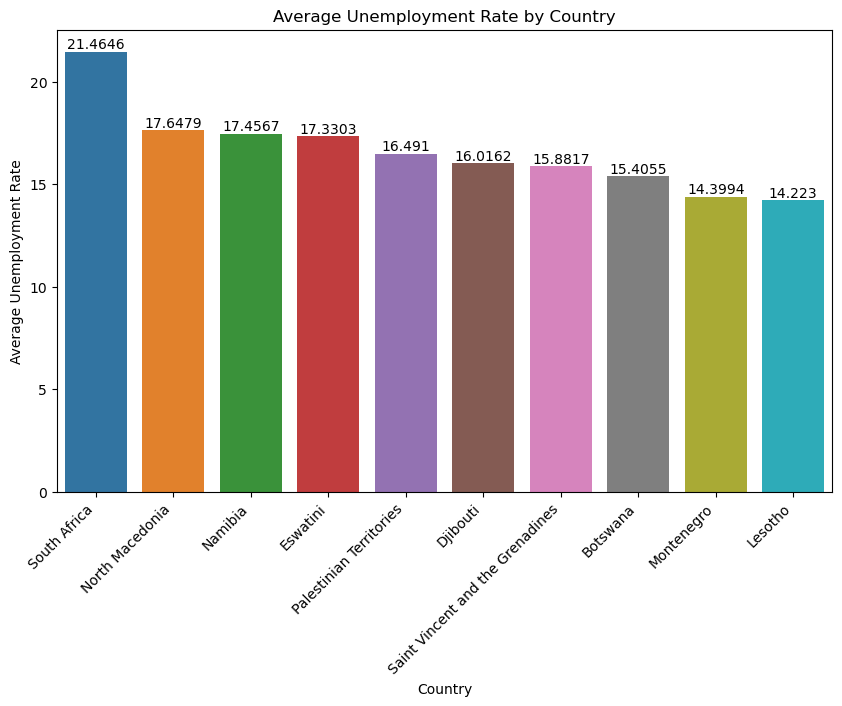

In [71]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlamak için opsiyonel
ax =  sns.barplot(data=top_10_unemployment, x='country_name', y='average_unemployment_rate' );
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Country')

# Ülkelere göre en yüksek 10 yetişkin erkek işsizlik oranlarını gösteren bir çubuk grafik oluşturduk.
# We created a bar chart showing the highest adult male unemployment rates by country.
# X eksenindeki etiketlerin görünümünü ayarlama
plt.xticks(rotation=45, ha='right')
for p in ax.containers:
    ax.bar_label(p);

In [72]:
lowest_10_unemployment = male_and_adults[['country_name', 'average_unemployment_rate']].sort_values(by='average_unemployment_rate', ascending=True).head(10)

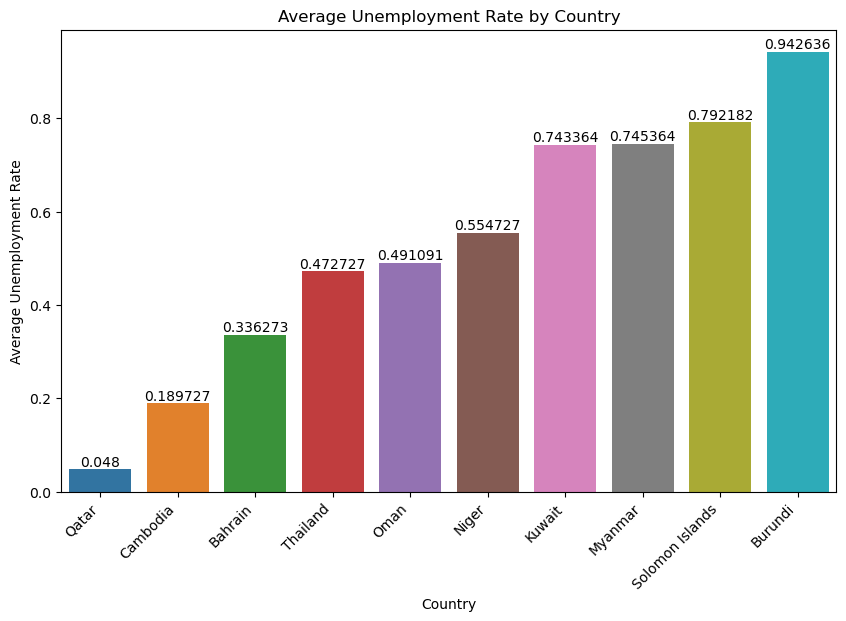

In [73]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlamak için opsiyonel
ax =  sns.barplot(data=lowest_10_unemployment, x='country_name', y='average_unemployment_rate' );
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Country')

# Ülkelere göre en düşük 10 yetişkin erkek işsizlik oranlarını gösteren bir çubuk grafik oluşturduk.
# We created a bar chart showing the 10 lowest adult male unemployment rates by country.
# X eksenindeki etiketlerin görünümünü ayarlama
plt.xticks(rotation=45, ha='right')
for p in ax.containers:
    ax.bar_label(p);

In [74]:
df.head(6)

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332,22.616818
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298,15.235000
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956,18.145455
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770,14.959545
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087,8.987909
5,Afghanistan,Unemployment rate by sex and age,Male,Under 15,Children,7.340,8.355,9.362,10.360,10.137,9.930,10.458,10.970,13.170,14.411,15.296,10.889909


In [75]:
male_and_children = df[(df["sex"] == "Male") & (df["age_categories"] == "Children")]
# "Male" cinsiyeti ve "Children" yaş kategorisine sahip olan verileri filtreleyerek yeni bir veri çerçevesi oluşturur
# Creates a new data frame by filtering data with gender “Male” and age category “Children”

In [76]:
top_10_children_unemployment = male_and_children[['country_name', 'average_unemployment_rate']].sort_values(by='average_unemployment_rate', ascending=False).head(10)

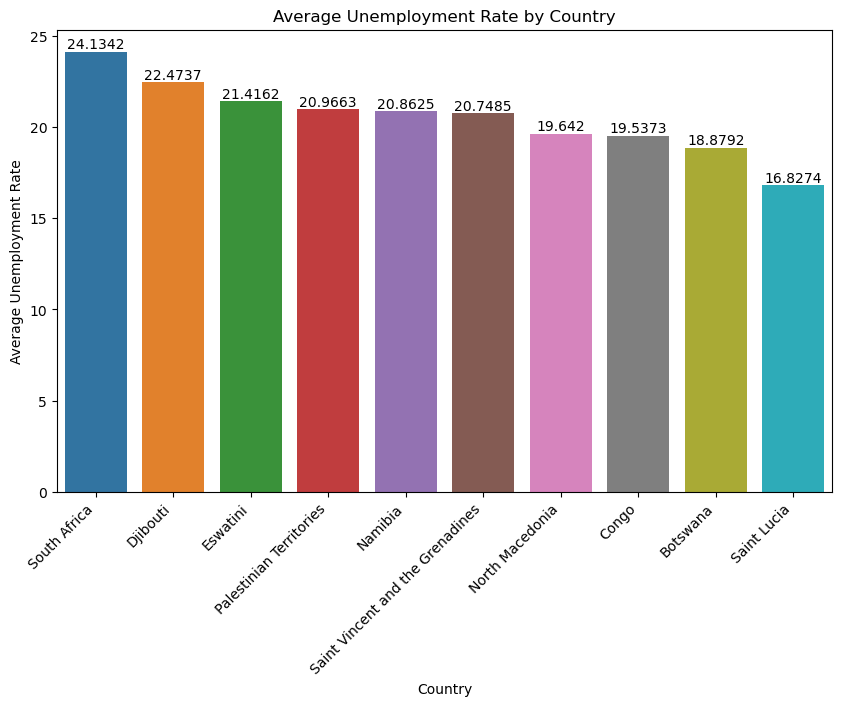

In [77]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlamak için opsiyonel
ax =  sns.barplot(data=top_10_children_unemployment, x='country_name', y='average_unemployment_rate' );
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Country')

# Ülkelere göre en yüksek 10 çocuk erkek işsizlik oranlarını gösteren bir çubuk grafik oluşturduk.
# We created a bar chart showing the top 10 highest child unemployment rates by country.
# X eksenindeki etiketlerin görünümünü ayarlama
plt.xticks(rotation=45, ha='right')
for p in ax.containers:
    ax.bar_label(p);

In [78]:
lowest_10_children_unemployment = male_and_children[['country_name', 'average_unemployment_rate']].sort_values(by='average_unemployment_rate', ascending=True).head(10)

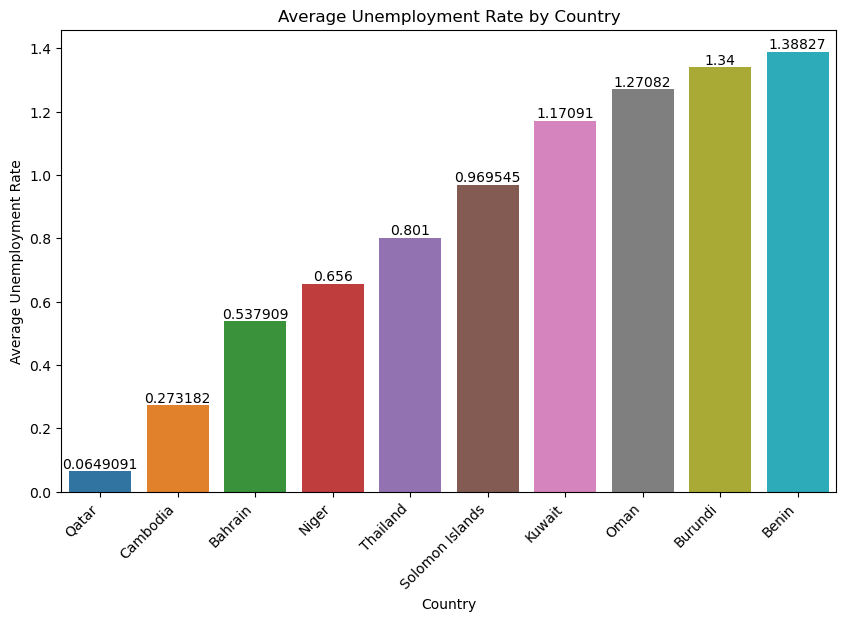

In [79]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlamak için opsiyonel
ax =  sns.barplot(data=lowest_10_children_unemployment, x='country_name', y='average_unemployment_rate' );
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Country')

# Ülkelere göre en düşük 10 çocuk erkek işsizlik oranlarını gösteren bir çubuk grafik oluşturduk.
# We created a bar chart showing the lowest 10 highest child unemployment rates by country.
# X eksenindeki etiketlerin görünümünü ayarlama
plt.xticks(rotation=45, ha='right')
for p in ax.containers:
    ax.bar_label(p);

In [80]:
male_and_children

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
5,Afghanistan,Unemployment rate by sex and age,Male,Under 15,Children,7.340,8.355,9.362,10.360,10.137,9.930,10.458,10.970,13.1700,14.4110,15.2960,10.889909
11,Albania,Unemployment rate by sex and age,Male,Under 15,Children,19.853,17.245,16.148,14.452,12.625,11.584,13.065,12.791,11.7510,11.1980,10.9510,13.787545
17,Algeria,Unemployment rate by sex and age,Male,Under 15,Children,9.021,9.941,8.206,9.858,10.000,10.126,11.773,11.446,10.2830,10.0040,9.8750,10.048455
23,Angola,Unemployment rate by sex and age,Male,Under 15,Children,15.053,15.416,15.785,16.092,16.328,16.450,16.796,15.820,14.3610,14.1260,13.9470,15.470364
29,Argentina,Unemployment rate by sex and age,Male,Under 15,Children,6.495,6.800,7.285,7.543,8.241,9.199,10.776,7.912,6.1500,6.2870,6.2570,7.540455
35,Armenia,Unemployment rate by sex and age,Male,Under 15,Children,13.130,13.612,14.091,14.543,15.003,14.112,15.022,13.035,11.3050,10.8480,10.6940,13.217727
41,Australia,Unemployment rate by sex and age,Male,Under 15,Children,6.002,6.046,5.650,5.525,5.281,5.207,6.554,5.214,3.7660,3.7020,3.8170,5.160364
47,Austria,Unemployment rate by sex and age,Male,Under 15,Children,5.887,6.181,6.478,5.968,5.108,4.682,5.360,6.512,5.1590,5.4460,5.9280,5.700818
53,Azerbaijan,Unemployment rate by sex and age,Male,Under 15,Children,4.004,4.073,4.118,4.103,4.060,4.262,6.097,5.121,4.7920,4.7660,4.8360,4.566545
59,Bahamas,Unemployment rate by sex and age,Male,Under 15,Children,13.037,11.090,11.084,8.354,10.048,9.977,12.893,11.734,10.1220,9.4790,9.3370,10.650455


In [81]:
turkey_unemployment = df[df["country_name"] == "Turkey"] 
# Türkiye işsizlik oranı
# Turkey unemployment rate

In [82]:
turkey_unemployment

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
1044,Turkey,Unemployment rate by sex and age,Female,15-24,Youth,19.894,21.829,23.175,25.146,24.607,29.804,29.369,28.339,24.951,23.706,24.245,25.005909
1045,Turkey,Unemployment rate by sex and age,Female,25+,Adults,9.756,10.167,11.192,11.115,11.219,13.221,11.710,11.803,11.073,10.290,10.526,11.097455
1046,Turkey,Unemployment rate by sex and age,Female,Under 15,Children,11.844,12.608,13.651,13.906,13.784,16.428,14.854,14.735,13.419,12.509,12.761,13.681727
1047,Turkey,Unemployment rate by sex and age,Male,15-24,Youth,16.277,16.197,16.962,17.412,17.265,22.037,22.248,19.205,16.265,14.851,15.198,17.628818
1048,Turkey,Unemployment rate by sex and age,Male,25+,Adults,7.458,7.691,8.005,7.699,7.914,10.386,10.480,9.090,7.552,6.977,7.223,8.225000
1049,Turkey,Unemployment rate by sex and age,Male,Under 15,Children,9.040,9.193,9.565,9.381,9.519,12.344,12.314,10.681,8.946,8.207,8.440,9.784545


In [83]:
Turkey_male_and_adults = turkey_unemployment[(turkey_unemployment["sex"] == "Male") & (turkey_unemployment["age_categories"] == "Adults")]
Turkey_male_and_adults
# Bu satırda, işsizlik veri setinden "Male" cinsiyetine sahip ve "Adults" (yetişkin) yaş kategorisinde olanları filtreliyoruz.
# Böylece sadece Türkiye'deki yetişkin erkeklerin işsizlik verilerini elde ediyoruz.
# In this row, we filter the unemployment data set by the gender “Male” and age category “Adults”.
# Thus, we obtain unemployment data only for adult males in Turkey.

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
1048,Turkey,Unemployment rate by sex and age,Male,25+,Adults,7.458,7.691,8.005,7.699,7.914,10.386,10.48,9.09,7.552,6.977,7.223,8.225


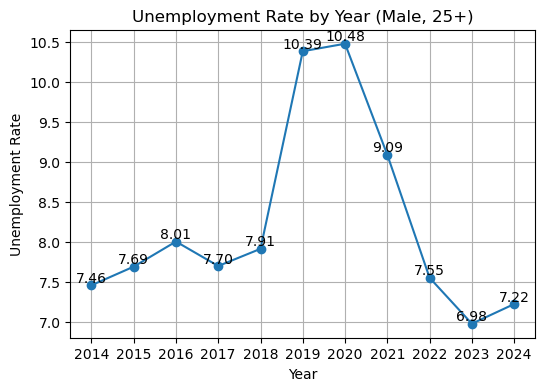

In [84]:
# Yıllar ve işsizlik oranları
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
unemployment_rates = [7.458, 7.691, 8.005, 7.699, 7.914, 10.386, 10.48, 9.09, 7.552, 6.977, 7.223]

# Bu grafikte, Türkiye'de 25 yaş ve üstü erkekler için yıllara göre işsizlik oranları gösterilmektedir.
# This graph shows unemployment rates by years for men aged 25 and above in Turkey.
plt.plot(years, unemployment_rates, marker='o')
plt.title("Unemployment Rate by Year (Male, 25+)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.grid(True)
plt.xticks(years)  # X ekseninde yılları göstermek için
for i, value in enumerate(unemployment_rates):
    plt.text(years[i], value, f'{value:.2f}', ha='center', va='bottom')  # Değerlerin üzerine yazdır
plt.show()

In [85]:
df.country_name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Congo, Democratic Republic of the', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Ivory Coast', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guam', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guya

In [86]:
european_countries = [
    "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", 
    "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", 
    "Estonia", "Finland", "France", "Germany", "Greece", 
    "Hungary", "Iceland", "Ireland", "Italy", "Latvia", 
    "Lithuania", "Luxembourg", "Malta", "Moldova, Republic of", 
    "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russian Federation", 
    "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", 
    "Switzerland", "Turkey", "Ukraine", "United Kingdom"
]
# Avrupa ülkelerinini listesini oluşturduk.
#We have created a list of European countries.

In [87]:
filtered_df = df[df['country_name'].isin([
    "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", 
    "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", 
    "Estonia", "Finland", "France", "Germany", "Greece", 
    "Hungary", "Iceland", "Ireland", "Italy", "Latvia", 
    "Lithuania", "Luxembourg", "Malta", "Moldova, Republic of", 
    "Montenegro", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Russian Federation", 
    "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", 
    "Switzerland", "Turkey", "Ukraine", "United Kingdom"
])]
# Avrupa ülkeleri verilerinde işlem yapmak için filtreleme yaptık.
# We filtered the data for European countries.

In [88]:
filtered_df

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
6,Albania,Unemployment rate by sex and age,Female,15-24,Youth,32.590,40.274,34.102,27.429,25.765,26.005,29.766,28.687,27.0040,25.7580,25.2100,29.326364
7,Albania,Unemployment rate by sex and age,Female,25+,Adults,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.0730,9.6600,9.4880,11.071818
8,Albania,Unemployment rate by sex and age,Female,Under 15,Children,15.476,17.115,14.477,12.511,11.876,11.324,12.536,12.337,11.4750,10.9380,10.6800,12.795000
9,Albania,Unemployment rate by sex and age,Male,15-24,Youth,43.556,39.644,37.630,34.023,29.906,27.953,31.426,30.366,29.0010,27.7310,27.2670,32.591182
10,Albania,Unemployment rate by sex and age,Male,25+,Adults,16.316,13.874,13.311,11.972,10.201,9.430,10.826,10.717,9.8820,9.4760,9.3240,11.393545
11,Albania,Unemployment rate by sex and age,Male,Under 15,Children,19.853,17.245,16.148,14.452,12.625,11.584,13.065,12.791,11.7510,11.1980,10.9510,13.787545
42,Austria,Unemployment rate by sex and age,Female,15-24,Youth,10.079,10.178,10.372,8.894,9.467,7.934,9.082,12.362,10.3170,10.7830,11.5540,10.092909
43,Austria,Unemployment rate by sex and age,Female,25+,Adults,4.718,4.669,4.904,4.578,4.091,3.974,4.505,5.684,4.1330,4.3560,4.7470,4.578091
44,Austria,Unemployment rate by sex and age,Female,Under 15,Children,5.427,5.371,5.588,5.099,4.728,4.422,5.020,6.402,4.7990,5.0660,5.4910,5.219364
45,Austria,Unemployment rate by sex and age,Male,15-24,Youth,10.907,11.576,12.359,10.968,9.658,9.501,11.416,11.790,10.3780,10.1360,10.9430,10.875636


In [89]:
european_adults_male = filtered_df[(filtered_df.age_categories == "Adults") & (filtered_df.sex == "Male")]
european_adults_male
# Avrupa'daki erkek yetişkinleri filtreledik.
# We filtered for male adults in Europe.

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
10,Albania,Unemployment rate by sex and age,Male,25+,Adults,16.316,13.874,13.311,11.972,10.201,9.430,10.826,10.717,9.8820,9.4760,9.3240,11.393545
46,Austria,Unemployment rate by sex and age,Male,25+,Adults,5.147,5.389,5.631,5.299,4.503,4.049,4.580,5.838,4.5100,4.8450,5.2970,5.008000
82,Belarus,Unemployment rate by sex and age,Male,25+,Adults,6.898,6.924,6.935,6.839,5.297,4.418,3.959,4.168,3.6710,3.5270,3.4480,5.098545
88,Belgium,Unemployment rate by sex and age,Male,25+,Adults,7.697,7.770,6.928,6.059,5.471,4.863,4.948,5.500,4.8010,5.1600,4.9900,5.835182
118,Bosnia and Herzegovina,Unemployment rate by sex and age,Male,25+,Adults,21.256,21.650,19.105,15.987,15.054,11.685,12.304,10.803,9.2590,8.6030,8.5590,14.024091
142,Bulgaria,Unemployment rate by sex and age,Male,25+,Adults,11.512,9.032,7.555,5.936,5.296,4.299,4.994,4.984,4.1330,3.7860,3.5120,5.912636
244,Croatia,Unemployment rate by sex and age,Male,25+,Adults,13.466,12.915,10.371,8.827,6.455,5.316,6.336,6.163,5.3070,4.5220,4.5300,7.655273
256,Cyprus,Unemployment rate by sex and age,Male,25+,Adults,14.852,13.217,11.447,9.678,6.706,5.301,6.343,6.138,4.8560,5.2100,5.2130,8.087364
262,Czechia,Unemployment rate by sex and age,Male,25+,Adults,4.323,3.703,2.907,1.997,1.510,1.510,1.941,2.006,1.5460,1.7900,1.7760,2.273545
274,Denmark,Unemployment rate by sex and age,Male,25+,Adults,5.284,4.893,4.352,4.421,3.817,3.891,4.178,4.049,3.3710,3.6710,3.6260,4.141182


In [90]:
european_adults_male = european_adults_male.reset_index(drop=True).set_index(pd.Index(range(1, len(european_adults_male) + 1)))
#Index'i sıfırlayıp 1'den başlayarak yeni bir index oluştururduk.
# We would reset the index and create a new index starting from 1.

In [91]:
filtered_df.describe(include=['object']).T
# Veri çerçevesindeki nesne türündeki sütunların temel istatistiklerini gösterir. 
#Kategorik verilerin dağılımını anlamak için faydalıdır.
# Shows basic statistics of columns of object type in the data frame. 
# Useful for understanding the distribution of categorical data.

,count,unique,top,freq
country_name,246,41,Albania,6
indicator_name,246,1,Unemployment rate by sex and age,246
sex,246,2,Female,123
age_group,246,3,15-24,82
age_categories,246,3,Youth,82


In [92]:
top_10_european_adults_male = european_adults_male[['country_name', 'average_unemployment_rate']].sort_values(by='average_unemployment_rate', ascending=False).head(10)
# average_unemployment_rate" sütununa göre azalan sırayla sıralanmış ve ilk 10 ülkeyi içeren bir veri çerçevesi oluşturur
# creates a data frame containing the top 10 countries sorted in descending order by the column “average_unemployment_rate

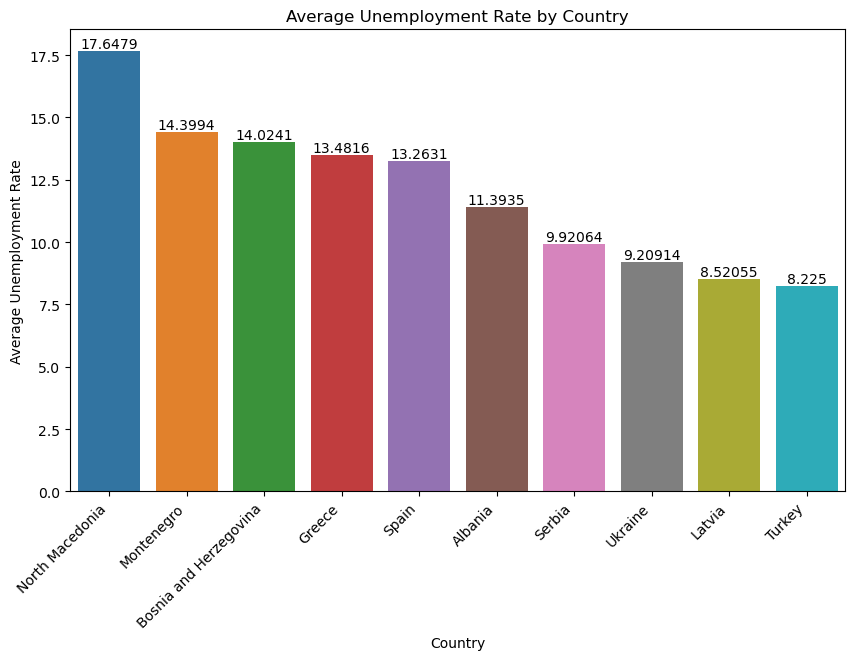

In [93]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlamak için opsiyonel
ax =  sns.barplot(data=top_10_european_adults_male, x='country_name', y='average_unemployment_rate' );
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Country')

# Avrupa ülkelerine göre en yüksek 10 yetişkin erkek işsizlik oranlarını gösteren bir çubuk grafik oluşturduk.
# We have created a bar chart showing the 10 highest adult male unemployment rates by European country.
# X eksenindeki etiketlerin görünümünü ayarlama
plt.xticks(rotation=45, ha='right')
for p in ax.containers:
    ax.bar_label(p);

In [94]:
lowest_10_european_adults_male = european_adults_male[['country_name', 'average_unemployment_rate']].sort_values(by='average_unemployment_rate', ascending=True).head(10)
# average_unemployment_rate" sütununa göre artan sırayla sıralanmış ve ilk 10 ülkeyi içeren bir veri çerçevesi oluşturur
# creates a data frame containing the top 10 countries sorted in ascending order by the column “average_unemployment_rate

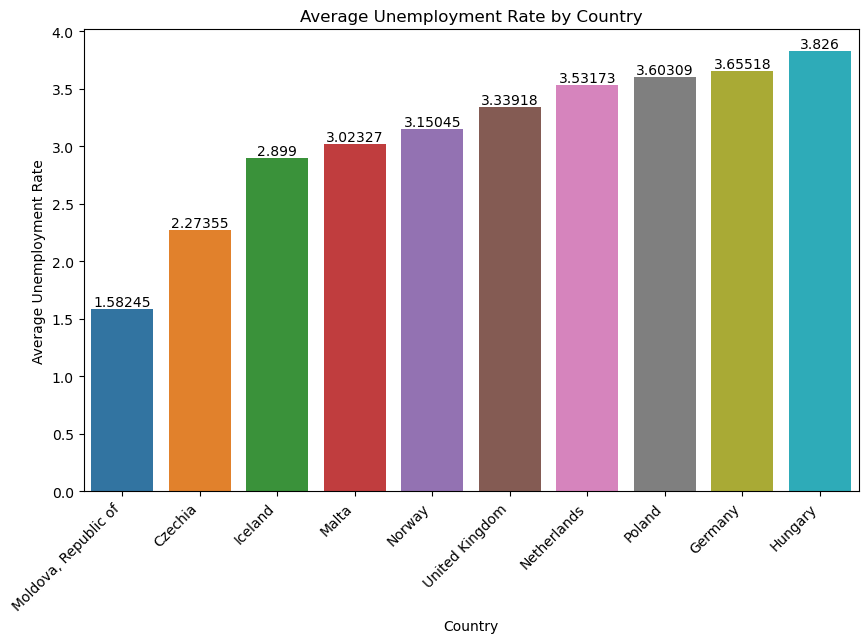

In [95]:
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlamak için opsiyonel
ax =  sns.barplot(data=lowest_10_european_adults_male, x='country_name', y='average_unemployment_rate' );
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Country')

# Avrupa ülkelerine göre en düşük 10 yetişkin erkek işsizlik oranlarını gösteren bir çubuk grafik oluşturduk.
# We have created a bar chart showing the 10 lowest adult male unemployment rates by European country.
# X eksenindeki etiketlerin görünümünü ayarlama
plt.xticks(rotation=45, ha='right')
for p in ax.containers:
    ax.bar_label(p);

In [96]:
filtered_df.head(12)

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_unemployment_rate
6,Albania,Unemployment rate by sex and age,Female,15-24,Youth,32.590,40.274,34.102,27.429,25.765,26.005,29.766,28.687,27.004,25.758,25.210,29.326364
7,Albania,Unemployment rate by sex and age,Female,25+,Adults,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488,11.071818
8,Albania,Unemployment rate by sex and age,Female,Under 15,Children,15.476,17.115,14.477,12.511,11.876,11.324,12.536,12.337,11.475,10.938,10.680,12.795000
9,Albania,Unemployment rate by sex and age,Male,15-24,Youth,43.556,39.644,37.630,34.023,29.906,27.953,31.426,30.366,29.001,27.731,27.267,32.591182
10,Albania,Unemployment rate by sex and age,Male,25+,Adults,16.316,13.874,13.311,11.972,10.201,9.430,10.826,10.717,9.882,9.476,9.324,11.393545
11,Albania,Unemployment rate by sex and age,Male,Under 15,Children,19.853,17.245,16.148,14.452,12.625,11.584,13.065,12.791,11.751,11.198,10.951,13.787545
42,Austria,Unemployment rate by sex and age,Female,15-24,Youth,10.079,10.178,10.372,8.894,9.467,7.934,9.082,12.362,10.317,10.783,11.554,10.092909
43,Austria,Unemployment rate by sex and age,Female,25+,Adults,4.718,4.669,4.904,4.578,4.091,3.974,4.505,5.684,4.133,4.356,4.747,4.578091
44,Austria,Unemployment rate by sex and age,Female,Under 15,Children,5.427,5.371,5.588,5.099,4.728,4.422,5.020,6.402,4.799,5.066,5.491,5.219364
45,Austria,Unemployment rate by sex and age,Male,15-24,Youth,10.907,11.576,12.359,10.968,9.658,9.501,11.416,11.790,10.378,10.136,10.943,10.875636


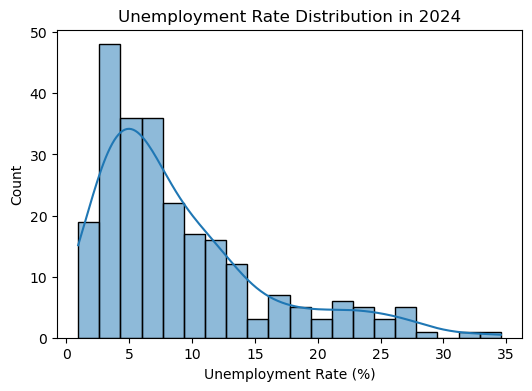

In [97]:
sns.histplot(filtered_df['2024'], bins=20, kde=True)
plt.title('Unemployment Rate Distribution in 2024')
plt.xlabel('Unemployment Rate (%)')
plt.show()
# 2024 yılı işsizlik oranlarının dağılımını gösteren histogram. Düşük oranlar genel ekonomik sağlığı, 
# yüksek oranlar ise potansiyel zorlukları işaret ediyor.
# Histogram showing the distribution of 2024 unemployment rates. Low rates indicate overall economic health, 
# higher rates indicate potential challenges.

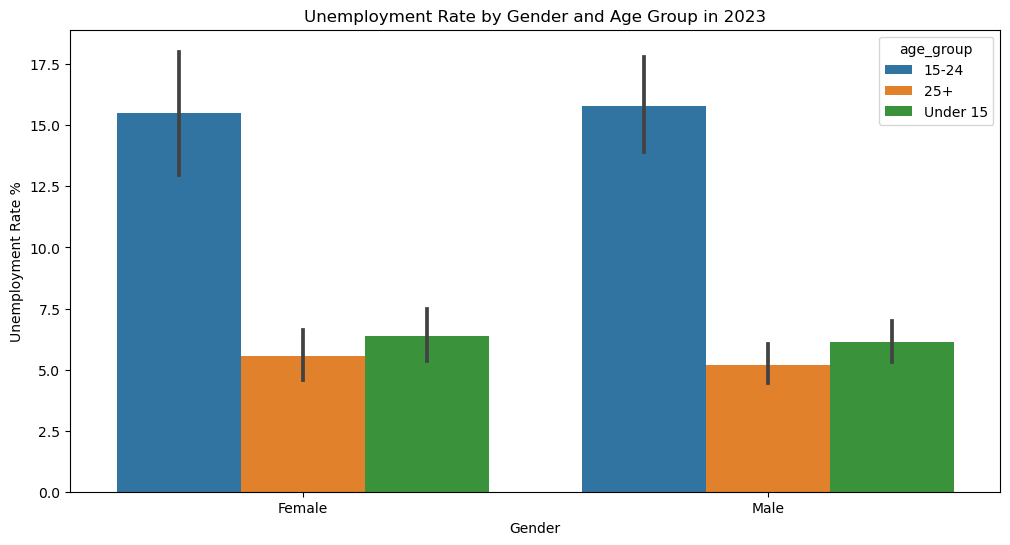

In [98]:
# İşsizlik oranlarını cinsiyet ve yaş grupları arasında karşılaştırdık.
# We compared unemployment rates across gender and age groups.
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='2023', hue='age_group', data=filtered_df)
plt.title('Unemployment Rate by Gender and Age Group in 2023')
plt.xlabel('Gender')
plt.ylabel('Unemployment Rate %')
plt.show()

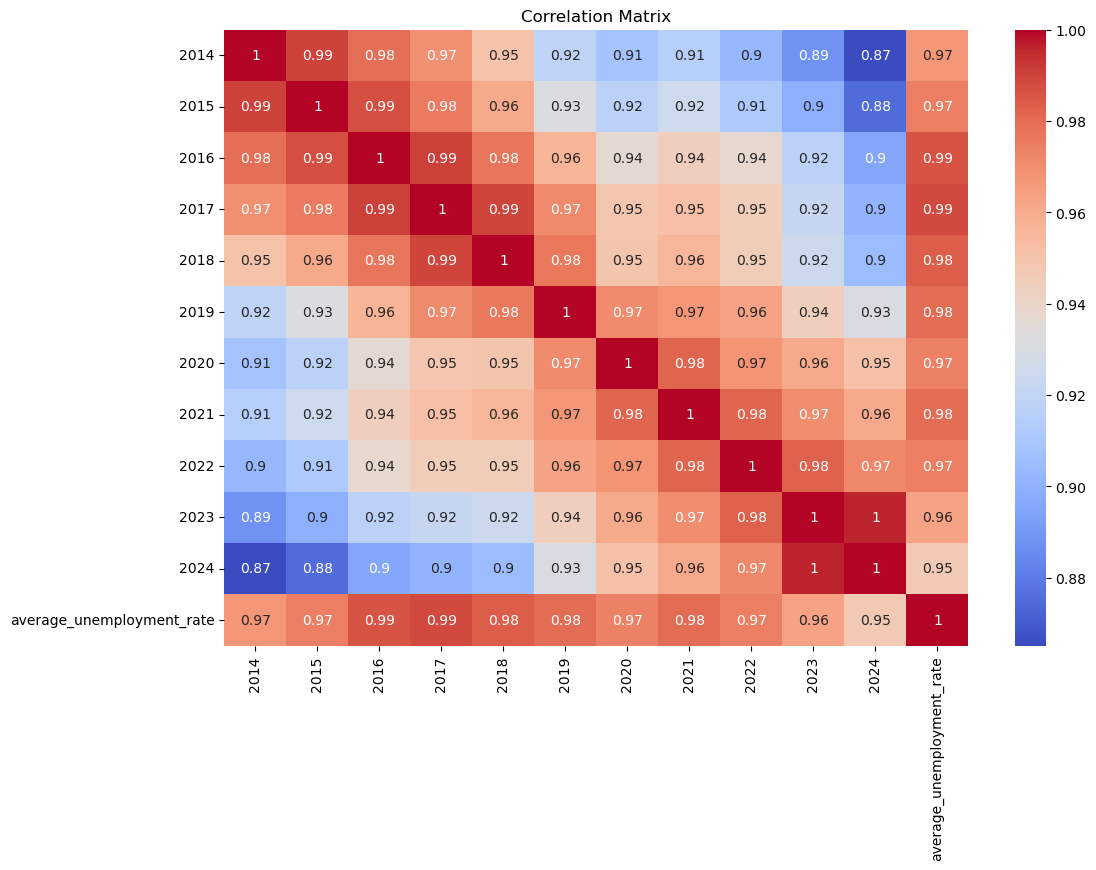

In [99]:
# We have created a year-based correlation.
# Yıl bazlı bir korelasyon oluşturduk.
numeric_columns = filtered_df.select_dtypes(include='number').columns
correlation_matrix = filtered_df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()